In [1]:

import os

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

import tensorflow.keras
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf
import pickle

tf.config.run_functions_eagerly(False)

2024-04-16 19:59:37.696155: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 19:59:37.736436: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 19:59:38.353438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/cezar/anaconda3/envs/disertatie/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as not

In [2]:
BINARY_SIZE = 2
PATCH_SIZE = 8
BATCH_SIZE = 256

In [37]:
dataset_name = "imagenet_resized/32x32"
imagenet_builder = tfds.builder(dataset_name)

In [38]:
print("Image shape: ", imagenet_builder.info.features['image'].shape)
print("Train instances: ", imagenet_builder.info.splits['train'].num_examples)
print("Validation instances: ", imagenet_builder.info.splits['validation'].num_examples)

Image shape:  (16, 16, 3)
Train instances:  1281167
Validation instances:  50000


In [40]:
tfds.display_progress_bar(True)

In [41]:
download_dir = "data/imagenet_resized"
imagened_download_config = tfds.download.DownloadConfig(manual_dir=download_dir)
imagenet_builder.download_and_prepare(download_dir=download_dir)


Dl Size...: 36355454 MiB [26:51, 22560.42 MiB/s]00, 26.67 url/s]
Dl Completed...: 3 url [26:51, 537.16s/ url]
                                                                         

Dataset imagenet_resized downloaded and prepared to /home/cezar/tensorflow_datasets/imagenet_resized/16x16/0.1.0. Subsequent calls will reuse this data.


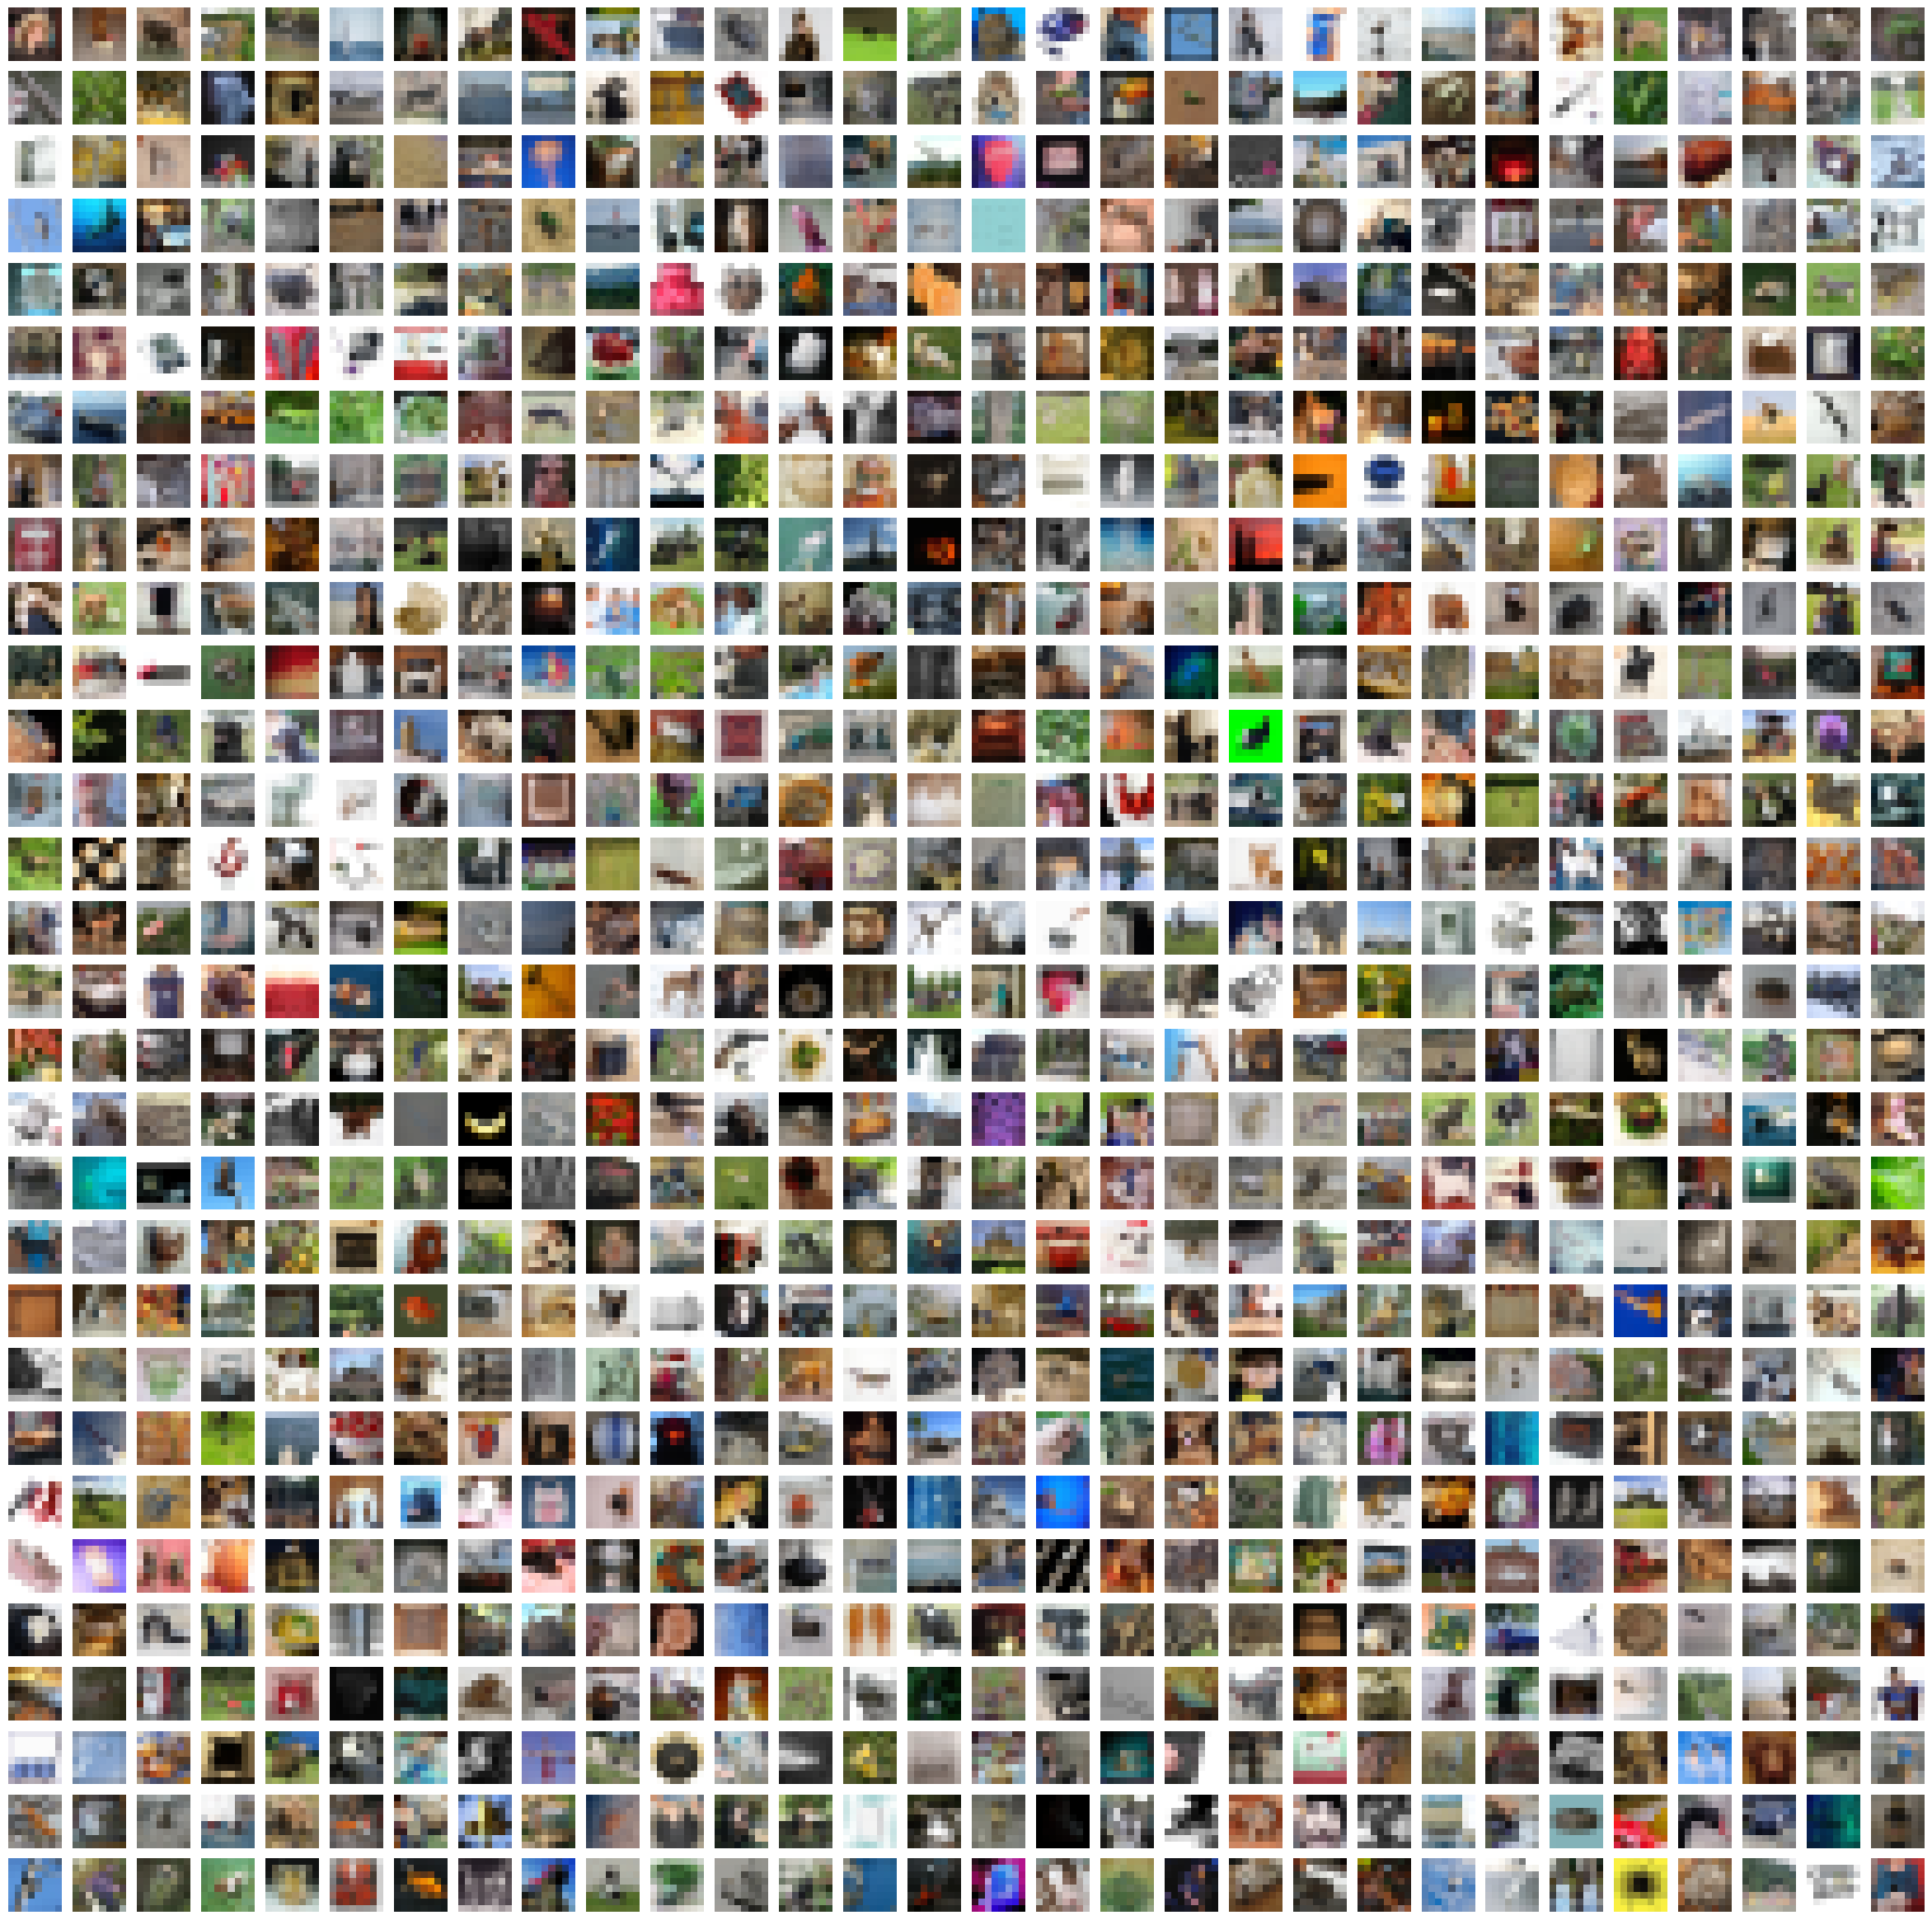

In [9]:
PATH = 'data/imagenet8_train/'

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

def load_databatch(data_folder, idx, img_size=8):
    data_file = os.path.join(data_folder, 'train_data_batch_')

    data = unpickle(data_file + str(idx))
    X = data['data']/255.0

    img_size2 = img_size * img_size

    X = np.dstack((X[:, :img_size2], X[:, img_size2:2*img_size2], X[:, 2*img_size2:]))
    X = np.reshape(X, [-1, img_size, img_size, 3])

    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(30, 30)
    # make a 30x30 grid of images of 800x800 pixels
    fig.set_size_inches(30, 30)
    for i in range(30):
        for j in range(30):
            ax[i, j].imshow(X[i*30 + j])
            ax[i, j].axis('off')
        
    plt.show()


load_databatch(PATH, 1)